# Objective
The goal of this project is to use Convolutional Neural Networks (CNNs) to try and identify potential cancer in the lypmph nodes. 

### About the Data
The PatchCamelyon benchmark is a new and challenging image classification dataset. It consists of 327.680 color images (96 x 96px) extracted from microscopic examinations or histopathologic scans of lymph node sections. Each image is annoted with a binary label indicating presence of metastatic tissue. The dataset is divided into a training set of 262.144 (2^18) examples, and a validation and test set both of 32.768 (2^15) examples. There is no overlap in WSIs between the splits, and all splits have a 50/50 balance between positive and negative examples. The data can be found [here](https://github.com/basveeling/pcam)

## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
import os
import matplotlib.pylab as plt
%matplotlib inline

## Import Data

In [3]:
train_df = pd.read_csv('data/train_labels.csv')
print(f'No. of training examples:{len(train_df)}')

No. of training examples:220025


In [4]:
train_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [5]:
test_files = os.listdir('./data/test')
print(f'No. of training examples:{len(test_files)}')

No. of training examples:1


It appears that our training dataframe has 220,025 observations and our test files contain 57,458 images. It looks like we have a 80% and 20% train test split. 

### Converting images to Pytorch tendors


### Train Dataset

In [22]:
dataset = torchvision.datasets.ImageFolder('./data/', transform=ToTensor())
print("Number of images in the training set:", len(dataset))


Number of images in the training set: 277483


In [23]:
img, label = dataset[0]
print(img.shape,label)
img

torch.Size([3, 96, 96]) 0


tensor([[[0.8784, 0.7529, 0.9765,  ..., 0.4235, 0.8235, 0.9686],
         [0.9961, 1.0000, 1.0000,  ..., 1.0000, 0.9098, 1.0000],
         [0.3333, 0.3804, 0.7020,  ..., 0.4078, 0.5725, 0.5137],
         ...,
         [0.6000, 0.6431, 0.7882,  ..., 0.6000, 0.7098, 0.6000],
         [0.7961, 0.6196, 0.6196,  ..., 0.7608, 0.4000, 0.3725],
         [0.7608, 0.8941, 0.7333,  ..., 0.6235, 0.2549, 0.4745]],

        [[0.7765, 0.6549, 0.8980,  ..., 0.3412, 0.7412, 0.8863],
         [0.8510, 0.9529, 0.9451,  ..., 0.9608, 0.7804, 0.9020],
         [0.1294, 0.1843, 0.5176,  ..., 0.2392, 0.3804, 0.3020],
         ...,
         [0.3451, 0.3804, 0.5216,  ..., 0.3608, 0.4549, 0.3373],
         [0.5608, 0.3765, 0.3686,  ..., 0.5373, 0.1608, 0.1176],
         [0.5373, 0.6706, 0.5020,  ..., 0.4039, 0.0235, 0.2275]],

        [[0.7882, 0.6667, 0.9059,  ..., 0.3686, 0.7608, 0.9059],
         [0.9216, 1.0000, 1.0000,  ..., 1.0000, 0.8471, 0.9686],
         [0.2784, 0.3294, 0.6510,  ..., 0.3451, 0.5059, 0.

### Test Dataset


In [24]:
datasetTest = torchvision.datasets.ImageFolder('./data', transform=ToTensor())
print("Number of images in the test dataset:", len(datasetTest))

Number of images in the test dataset: 277483


In [25]:
img, label = datasetTest[0]
print(img.shape,label)
img

torch.Size([3, 96, 96]) 0


tensor([[[0.8784, 0.7529, 0.9765,  ..., 0.4235, 0.8235, 0.9686],
         [0.9961, 1.0000, 1.0000,  ..., 1.0000, 0.9098, 1.0000],
         [0.3333, 0.3804, 0.7020,  ..., 0.4078, 0.5725, 0.5137],
         ...,
         [0.6000, 0.6431, 0.7882,  ..., 0.6000, 0.7098, 0.6000],
         [0.7961, 0.6196, 0.6196,  ..., 0.7608, 0.4000, 0.3725],
         [0.7608, 0.8941, 0.7333,  ..., 0.6235, 0.2549, 0.4745]],

        [[0.7765, 0.6549, 0.8980,  ..., 0.3412, 0.7412, 0.8863],
         [0.8510, 0.9529, 0.9451,  ..., 0.9608, 0.7804, 0.9020],
         [0.1294, 0.1843, 0.5176,  ..., 0.2392, 0.3804, 0.3020],
         ...,
         [0.3451, 0.3804, 0.5216,  ..., 0.3608, 0.4549, 0.3373],
         [0.5608, 0.3765, 0.3686,  ..., 0.5373, 0.1608, 0.1176],
         [0.5373, 0.6706, 0.5020,  ..., 0.4039, 0.0235, 0.2275]],

        [[0.7882, 0.6667, 0.9059,  ..., 0.3686, 0.7608, 0.9059],
         [0.9216, 1.0000, 1.0000,  ..., 1.0000, 0.8471, 0.9686],
         [0.2784, 0.3294, 0.6510,  ..., 0.3451, 0.5059, 0.

After converting our images to a tensor we are able to identify the size of our images. `torch.Size` returned retuned the size of each image as you can see our images are in shape of `[3,96,96]` where the `3` represents our channel. Since our images are color images our chanel size is `3` and the length and width of each image is `96 pixels`. 

# Exploratory Data Analysis

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [27]:
train_df.label.unique()

array([0, 1], dtype=int64)

We don't have any labels that are not either `1` or `0`.

### Check for duplicates

In [28]:
train_df[train_df.duplicated(keep=False)]

,id,label


No duplicate `id` or `label` found in our dataset.

### Malignant vs Benign
Let us identify our cases using the given labels in the csv file. We know that an observation with a value of `1` indicates our histophathological image is malignant and `0` is benign.

0    130908
1     89117
Name: label, dtype: int64


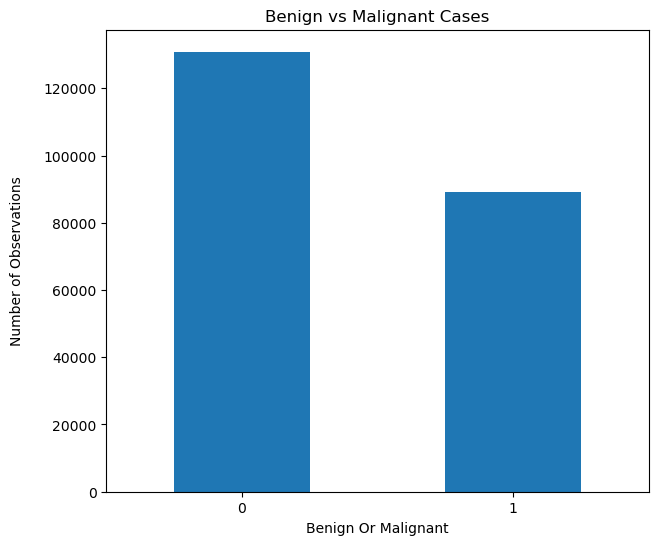

In [29]:
benignOrMalignant = train_df['label'].value_counts().plot(kind='bar', figsize=(7,6), rot=0)
plt.xlabel('Benign Or Malignant')
plt.ylabel('Number of Observations', labelpad=14)
plt.title('Benign vs Malignant Cases')
print(train_df.label.value_counts())



In our `train_df` dataframe the distribution between benign and malignant cases were 130,908 and 89,117 respectively. 

In [31]:
def show_example(img, label):
    print("Label:", dataset.classes[label], '('+str(label)+')')
    plt.imshow(img.permute(1,2,0))

Label: test (0)


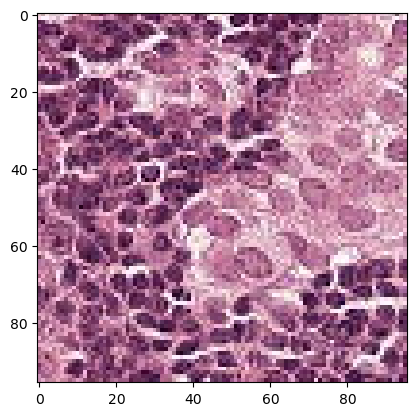

In [32]:

show_example(*dataset[0])

Label: test (0)


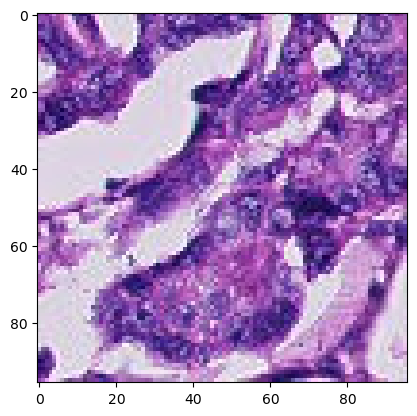

In [34]:
show_example(*dataset[1])